# Initial Project Description

**Project Goal:**

The goal of this project is to predict customer churn for a telecom company based on customer attributes.  
By understanding which customers are likely to churn, the company can take proactive measures to retain them.


**2. Data Description**
**Dataset: Telco Customer Churn**

**Key Characteristics:**

Categorical Features: gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, etc.
Numerical Features: tenure, MonthlyCharges, TotalCharges
Target Variable: Churn (Yes/No
                       
**Exploration Steps:**
                        
Load the data and examine the structure.
Handle missing values (if any).
Convert data types where necessary (e.g., TotalCharges).
Visualize distributions and relationships between features.

**3. Exploratory Data Analysis (EDA)**

In [6]:
# Step 1: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
# Step 2: Load Dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
# Step 3: Initial Data Overview
print(data.head())
print(data.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [9]:
# Step 4: Data Cleaning
# Convert TotalCharges to numeric and handle errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)

In [10]:
# Step 5: Descriptive Statistics
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


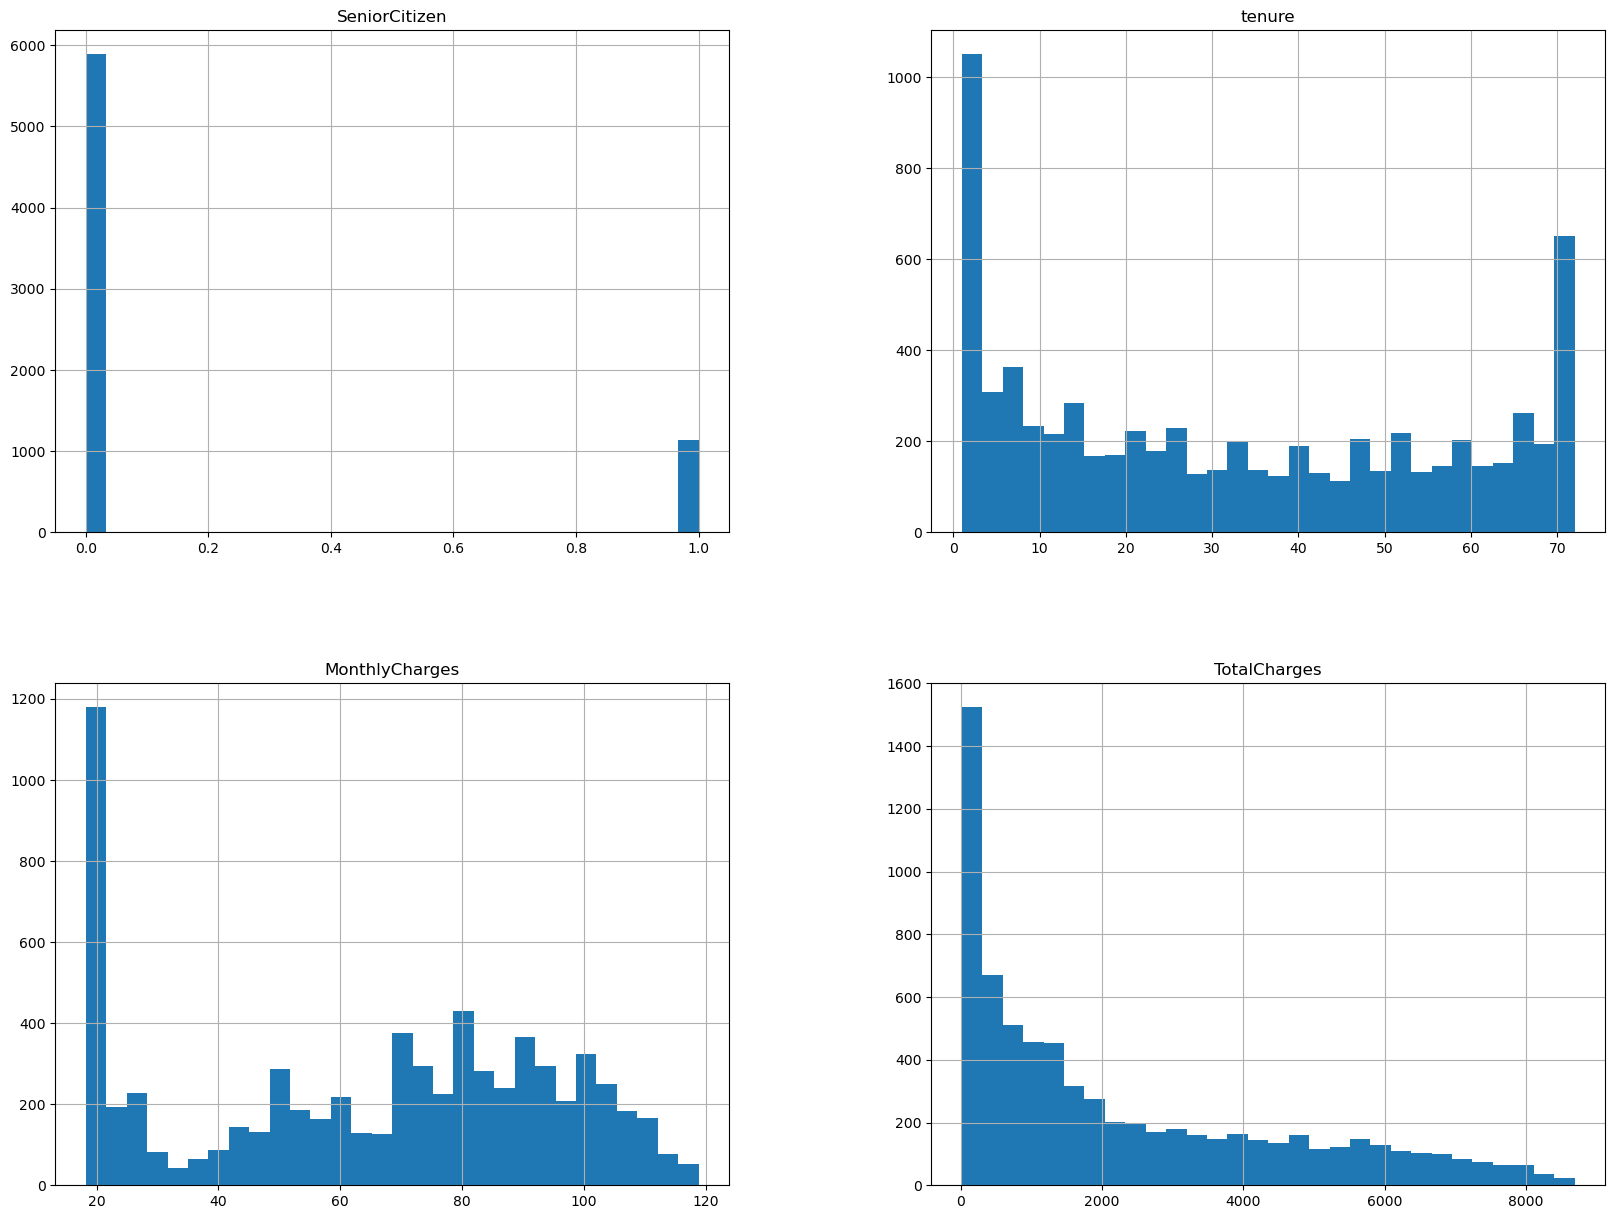

In [11]:
# Step 6: Data Visualization
# Distribution of numerical features
data.hist(bins=30, figsize=(20,15))
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


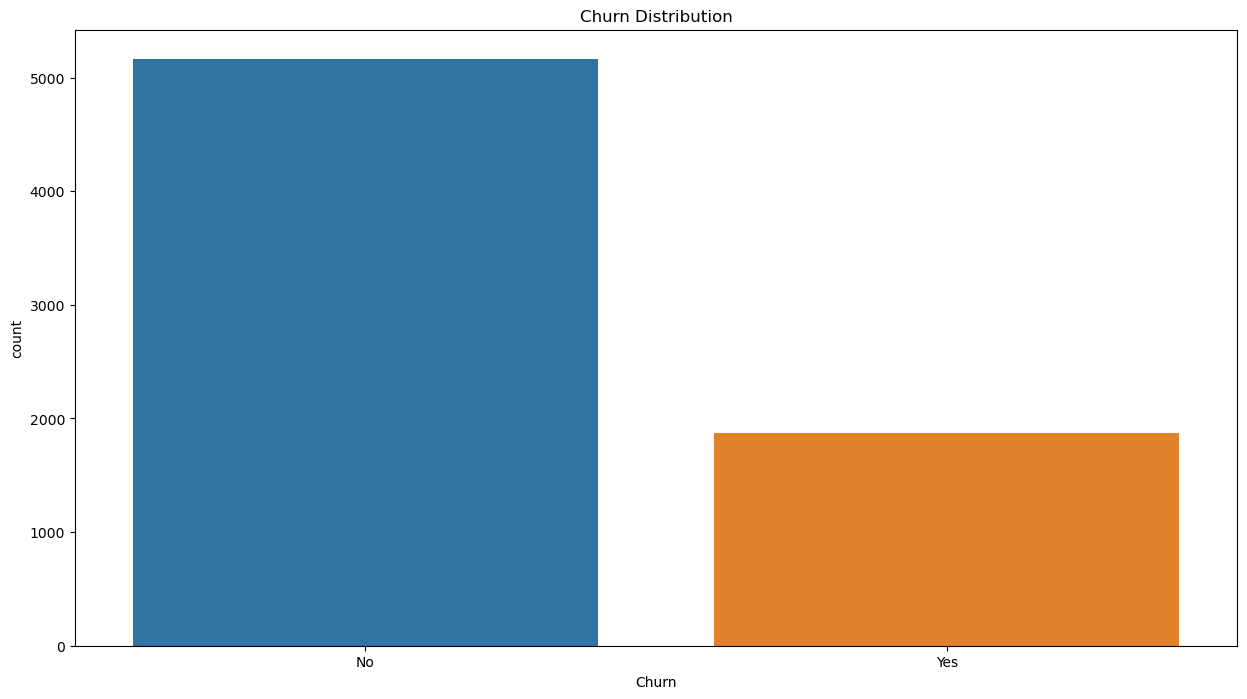

In [12]:
# Ensure the 'Churn' column is being treated as categorical
data['Churn'] = data['Churn'].astype('category')

# Visualizing the 'Churn' distribution
plt.figure(figsize=(15,8))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

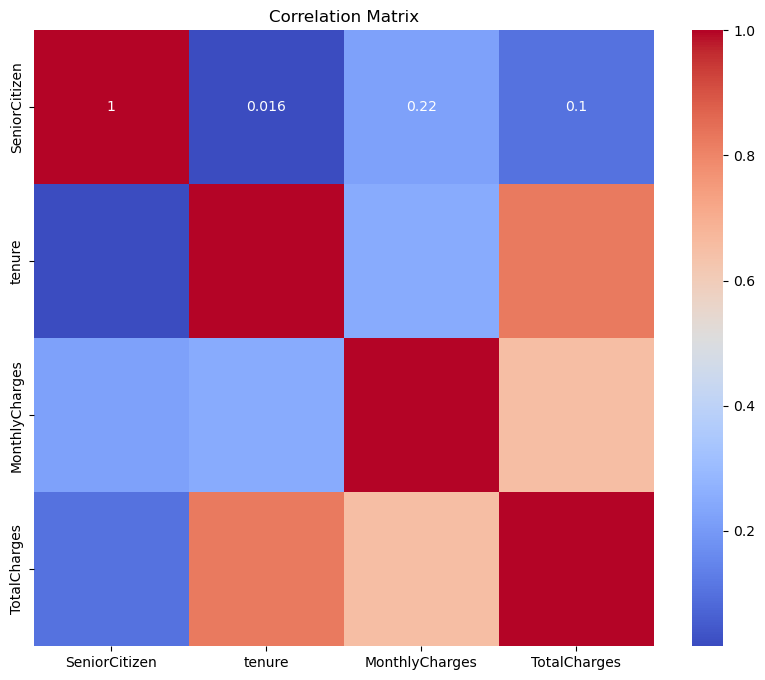

In [13]:
# Selecting only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Plotting the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

**4. Revised Project Question**
Revised Question: Based on the insights from EDA, 
the revised question is: "What are the key drivers of customer churn, 
and how accurately can we predict customer churn using these features?"

**5. Baseline Model**
**Model: Logistic Regression**

Purpose: Establish a baseline performance for customer churn prediction.

In [14]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

In [15]:
# Split data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

In [16]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [18]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [19]:
# Predict on validation data
y_pred = model.predict(X_val)
print(f'Accuracy: {accuracy_score(y_val, y_pred)}')
print(classification_report(y_val, y_pred))

Accuracy: 0.7867803837953091
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1033
         Yes       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



**6. Machine Learning Pipeline**

**Prepare Data**

In [20]:
 # Data Cleaning
# Handle any additional missing values if found during further exploration
data.dropna(inplace=True)


In [21]:

# Feature Selection
# Based on EDA, select features that have strong correlations with churn
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService', 'PaymentMethod']

X = data[selected_features]
y = data['Churn']



In [22]:
# Data Transformation
X = pd.get_dummies(X, drop_first=True)


**Evaluate Algorithms**



In [23]:
# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



In [24]:
# Logistic Regression (already done)
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)



LogisticRegression(random_state=42)

In [25]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)



In [26]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)



In [27]:
# Compare Models
print("Logistic Regression:", accuracy_score(y_val, logreg_model.predict(X_val)))
print("Random Forest:", accuracy_score(y_val, y_pred_rf))
print("Gradient Boosting:", accuracy_score(y_val, y_pred_gb))



Logistic Regression: 0.7697228144989339
Random Forest: 0.7604832977967306
Gradient Boosting: 0.7839374555792467


In [28]:
# Evaluate with AUC-ROC
rf_probs = rf_model.predict_proba(X_val)[:, 1]
gb_probs = gb_model.predict_proba(X_val)[:, 1]
logreg_probs = logreg_model.predict_proba(X_val)[:, 1]

rf_auc = roc_auc_score(y_val, rf_probs)
gb_auc = roc_auc_score(y_val, gb_probs)
logreg_auc = roc_auc_score(y_val, logreg_probs)

print(f"Logistic Regression AUC: {logreg_auc}")
print(f"Random Forest AUC: {rf_auc}")
print(f"Gradient Boosting AUC: {gb_auc}")


Logistic Regression AUC: 0.8156529706840054
Random Forest AUC: 0.7960692857623557
Gradient Boosting AUC: 0.829578456393558


**Improve Accuracy**

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}




In [30]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)



In [31]:
# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')



In [ ]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)



In [ ]:
# Output the best parameters and best score from the grid search
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")



In [ ]:
# Use the best estimator to make predictions on the validation set
best_gb_model = grid_search.best_estimator_
y_pred_gb_tuned = best_gb_model.predict(X_val)



In [ ]:
# Evaluate the tuned model's performance
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score



In [ ]:
# Accuracy
tuned_accuracy = accuracy_score(y_val, y_pred_gb_tuned)
print(f"Tuned Gradient Boosting Accuracy: {tuned_accuracy}")



In [ ]:
# Classification Report
print(classification_report(y_val, y_pred_gb_tuned))



In [ ]:
# AUC-ROC
tuned_gb_probs = best_gb_model.predict_proba(X_val)[:, 1]
tuned_gb_auc = roc_auc_score(y_val, tuned_gb_probs)
print(f"Tuned Gradient Boosting AUC-ROC: {tuned_gb_auc}"